In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-data/Credit Card Customer Data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('/kaggle/input/credit-card-customer-data/Credit Card Customer Data.csv')

## EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [6]:
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [7]:
data.isnull().sum() #no missing value has been fouond

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [8]:
data.drop(columns=['Sl_No', 'Customer Key'],inplace=True) # drop unnecessory column

### UNIVARIATE ANALYSIS

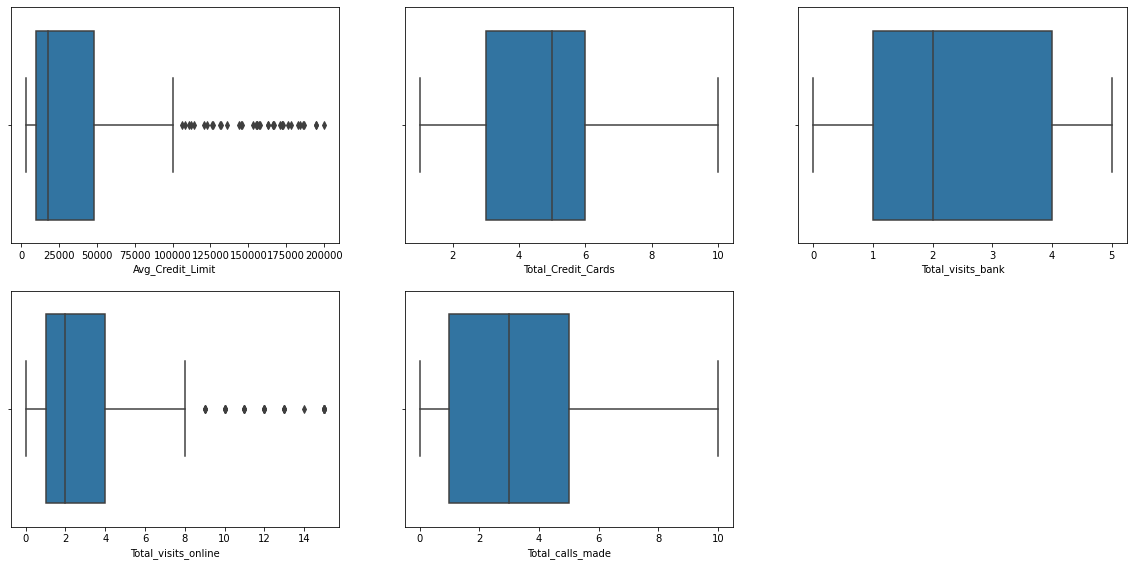

In [9]:
i=1
plt.figure(figsize=(20,20))
for j in data.columns:
    plt.subplot(4,3,i)
    sns.boxplot(data=data,x=j)
    i+=1

#### Here we have some outlier but we dont remove it due to the loss of data

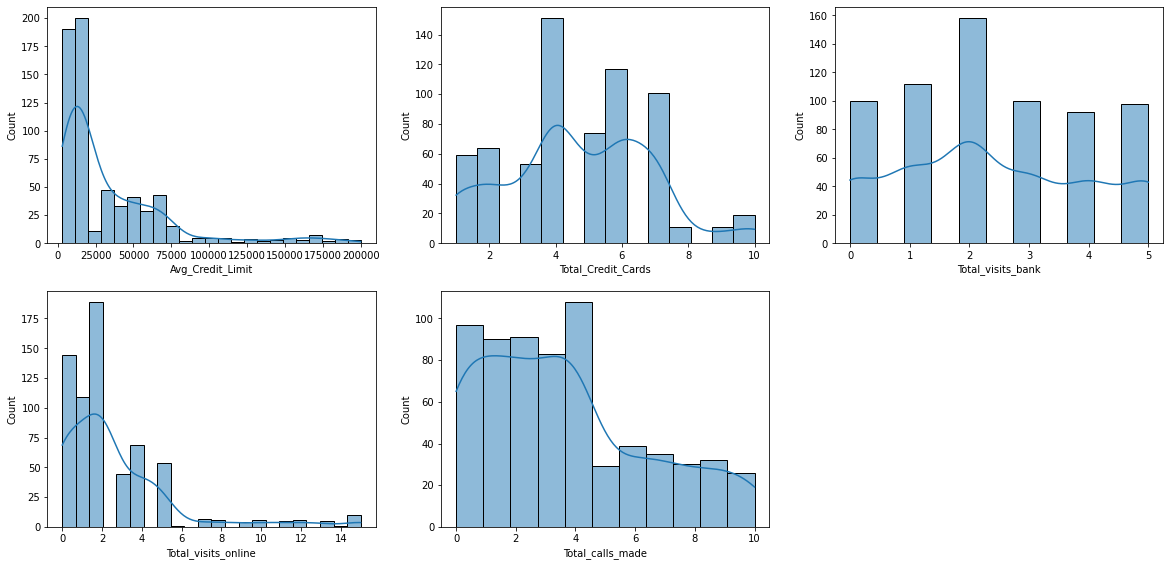

In [10]:
i=1
plt.figure(figsize=(20,20))
for j in data.columns:
    plt.subplot(4,3,i)
    sns.histplot(data=data,x=data[j],kde=True)
    i+=1

### BIVARIATE ANALYSIS

In [11]:
data.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


sns.heatmap(data.corr(),cmap='gist_earth_r',linewidths=1,annot=True)

#### 1- avg_credit_limit and total_credit_cards has the high +ve correlation of 0.61..                                                                                                                                                  2- avg_credit_limit and total_visits_online has the high +ve correlation of 0.55..                                                                                                                                                                                                                                                                  3-total_credit_card and total_calls_made has the high -ve correlation of -0.65....                                                                                                                                                    4-total_visit_bank and total_visit_online has high -ve correlation of -0.55....                                                                                                                                                    5-total_calls_made and total_visit_bank has high -ve correlation of -0.51.....

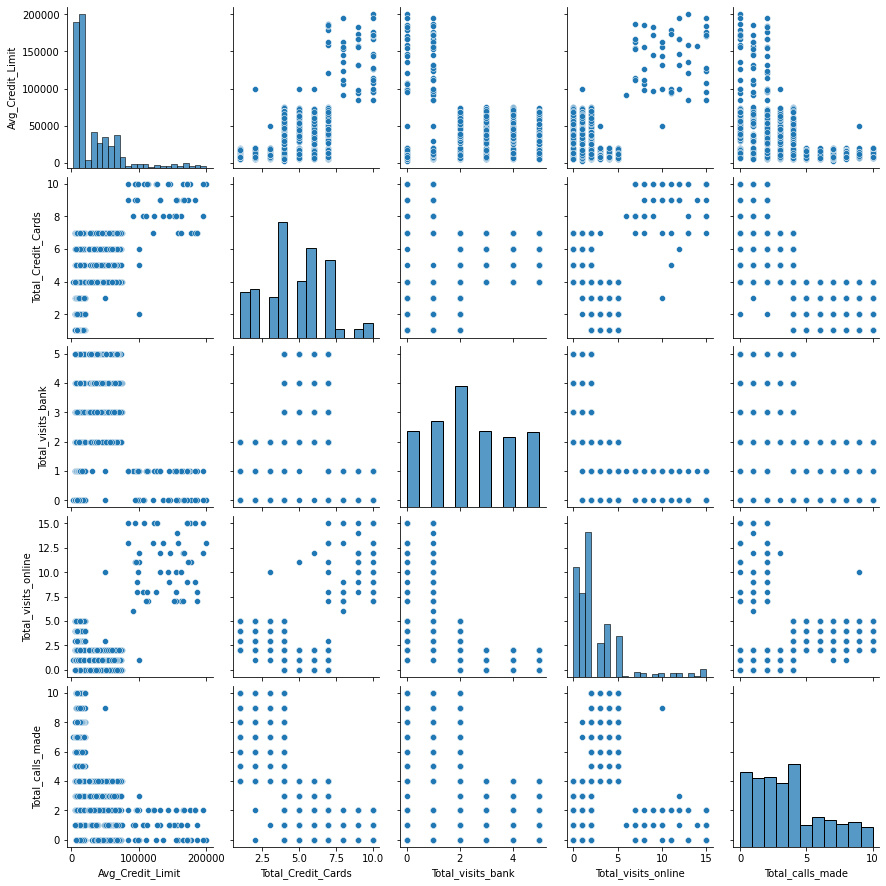

In [12]:
sns.pairplot(data)

## K-MEAN CLUSTERING

In [13]:
sc=StandardScaler()# scaling of data
scaled=sc.fit_transform(data)
scaled_data=pd.DataFrame(scaled,columns=data.columns)


In [14]:
wcss=[]
for i in range(1,13):
    km=KMeans(n_clusters=i)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

In [15]:
slh_score=[]
for i in range(2,13):
    km=KMeans(n_clusters=i)
    km.fit(data)
    slh_score.append(silhouette_score(scaled_data,km.labels_))

Text(0.5, 0, 'k-value')

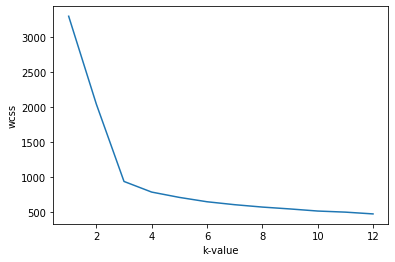

In [16]:
plt.plot(range(1,13),wcss)
plt.ylabel('wcss')
plt.xlabel('k-value')

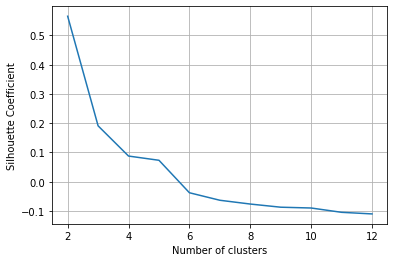

In [17]:
plt.plot(range(2,13),slh_score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

#### Here we have choose k- value such that wcss is minimum and silihoutte coefficint is more so we choose k=3

In [18]:
km1=KMeans(n_clusters=3)
km1.fit(scaled_data)
y=km1.predict(scaled_data)
data['label']=y

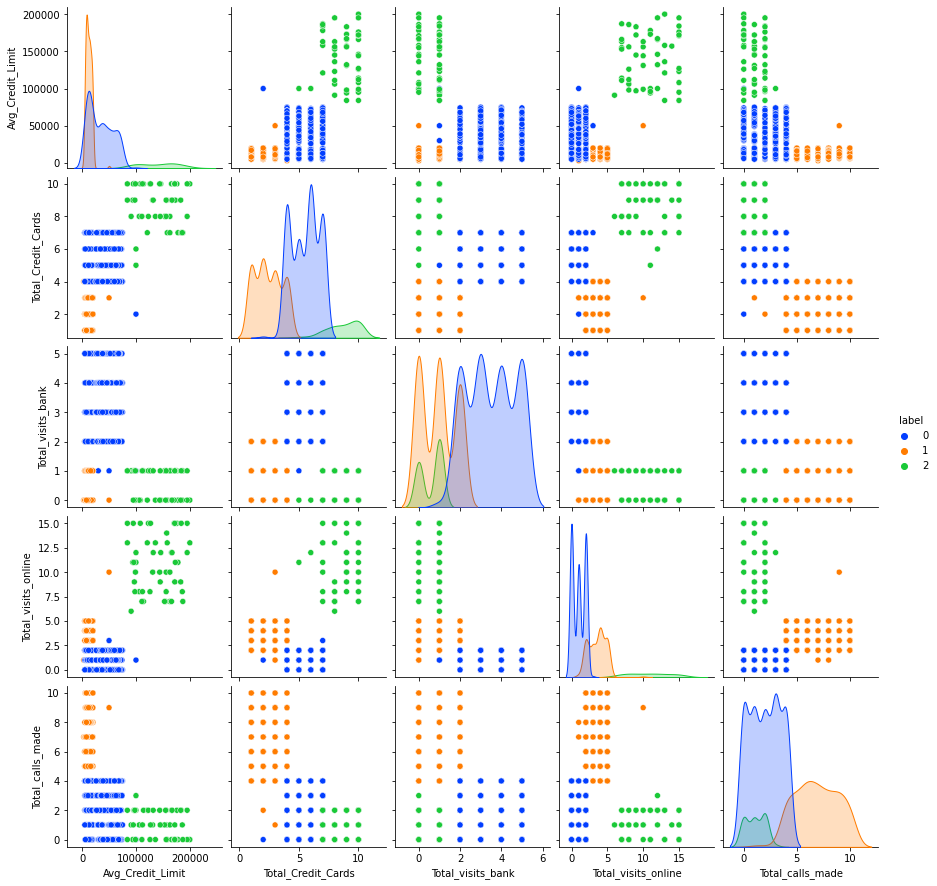

In [19]:
sns.pairplot(data,hue='label',palette='bright')

In [20]:
center=km1.cluster_centers_# centre of clustering
center

array([[-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

In [21]:
Kmean_silihoute=silhouette_score(scaled_data,km1.labels_)
Kmean_silihoute

0.5157182558881063

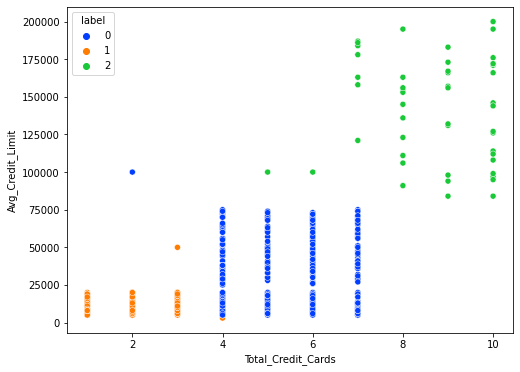

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,y='Avg_Credit_Limit',x='Total_Credit_Cards',hue='label',palette='bright')
plt.show()

#### segment-0:total_credit_card[4-6] and avg_credit_limit(0-75000)----    
#### segment-1:total_credit_card(0-3) and avg_credit_limit(0-25000)----
#### segment-2:total_credit_card(6-10) and avg_credit_limit>75000 ----

#### we can observe that higher the avg_credit_limit higher is total_credit_card aquired by customer










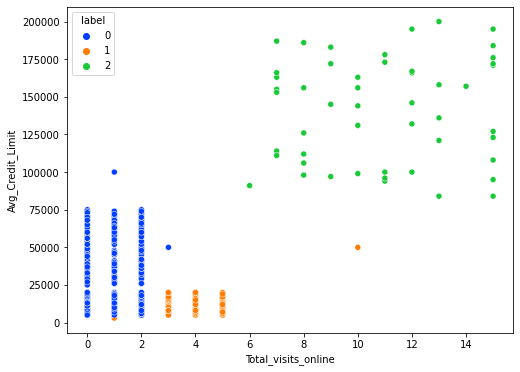

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,y='Avg_Credit_Limit',x='Total_visits_online',hue='label',palette='bright')
plt.show()

#### segment-0:total_visit_online<=2 and avg_credit_limit<=100000
#### segment-1:total_visit_online[3-5] and avg_credit_limit<=25000
#### segment-2: total_visit_online[6-15] and avg_credit_limit>100000
#### we can see that greater the avg_credit_limit,customer visit more frequently online(6-15)

<AxesSubplot:xlabel='Total_calls_made', ylabel='Total_Credit_Cards'>

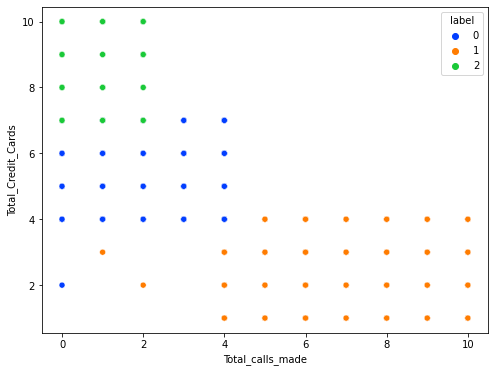

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Total_calls_made',y='Total_Credit_Cards',hue='label',palette='bright')

#### segment-0:total_call_made[0-4] and total_credit_card[4-6]
#### segment-1:total_call_made[4-10] and total_credit_card[0-4]
#### segment-2:total_call_made[0-2] and total_credit_card[7-10]
#### less the total call made greater the total cedit card

<AxesSubplot:xlabel='Total_visits_online', ylabel='Total_Credit_Cards'>

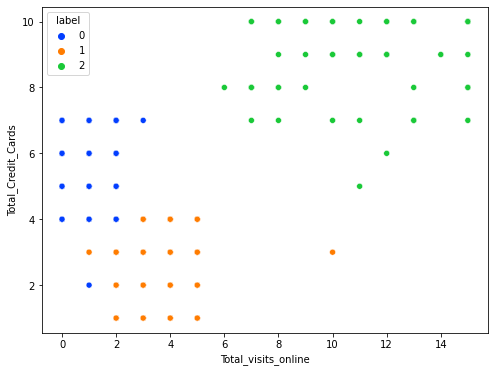

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Total_visits_online',y='Total_Credit_Cards',hue='label',palette='bright')

#### here we can also see that person having credit card (6-10) more frequently he visits online[6-15]

In [26]:
import scipy.cluster.hierarchy as shc

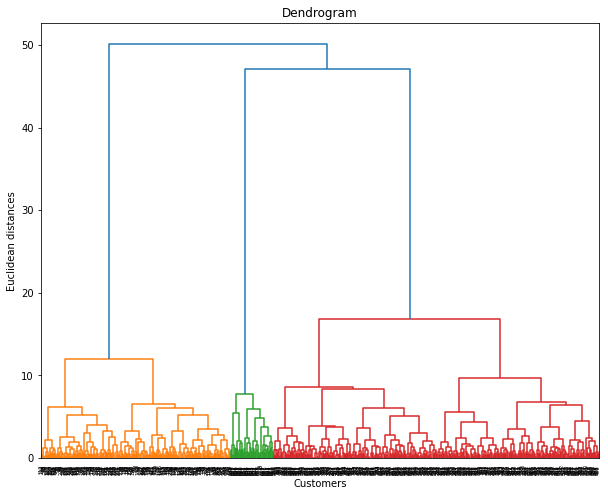

In [27]:
plt.figure(figsize=(10,8))
dend=shc.dendrogram(shc.linkage(scaled_data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
h_cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [30]:
y_h=h_cluster.fit_predict(scaled_data)

In [31]:
data['H_label']=y_h

In [32]:
H_silihoute=silhouette_score(scaled_data,h_cluster.labels_)
H_silihoute

0.5147639589977819

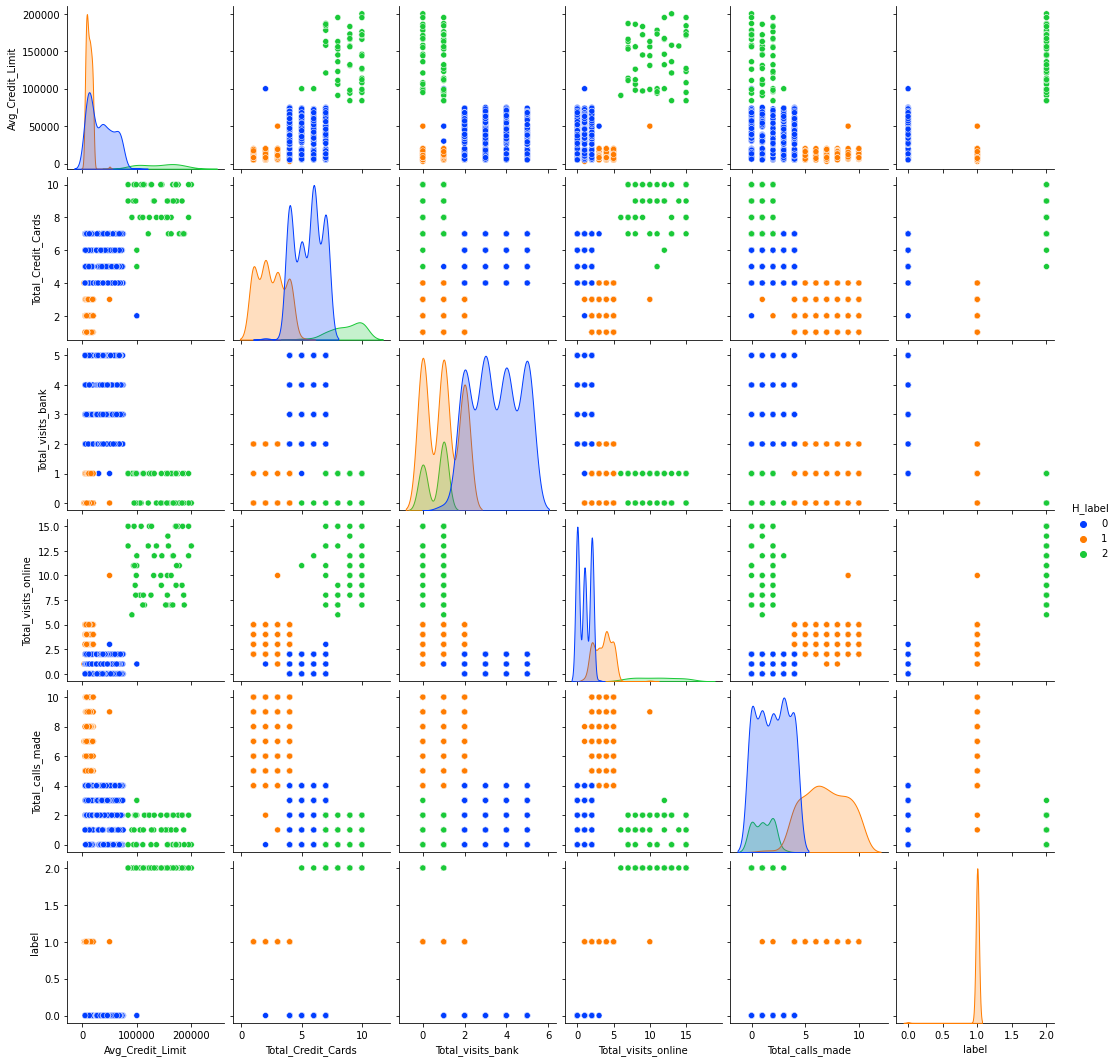

In [33]:
sns.pairplot(data=data,hue='H_label',palette='bright')

#### Silhouette Coefficient:
#### Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
#### 1: Means clusters are well apart from each other and clearly distinguished.
#### 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
#### -1: Means clusters are assigned in the wrong way.

In [34]:
print(Kmean_silihoute,H_silihoute)# silihoute score for both clustering k-mean and H-clustering

0.5157182558881063 0.5147639589977819
